In [89]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("../Q1_clean.csv")
data = df.fillna(0)

# EDA

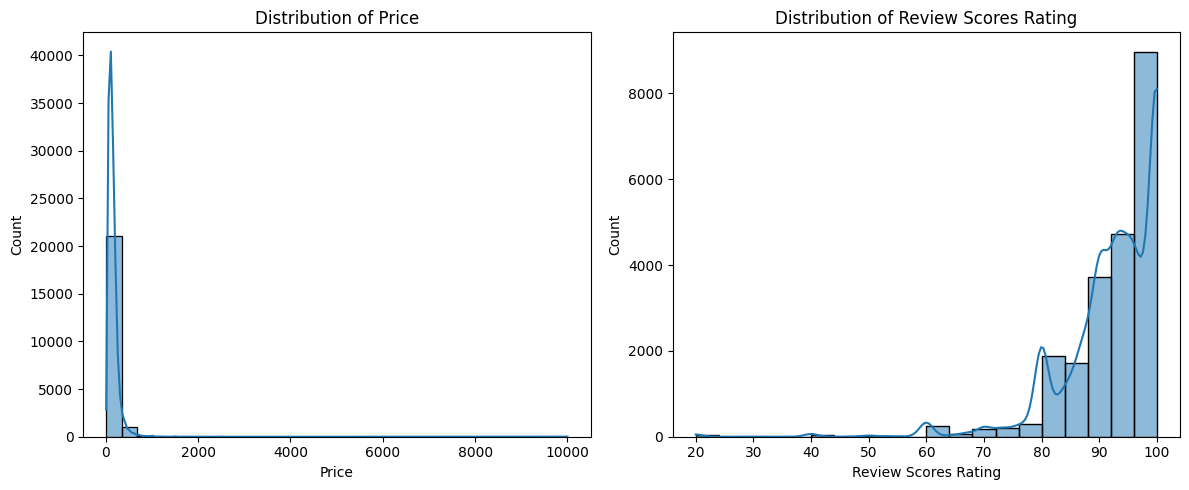

In [91]:
df.columns = df.columns.str.strip()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Price")

plt.subplot(1, 2, 2)
sns.histplot(df['Review Scores Rating'], bins=20, kde=True)
plt.title("Distribution of Review Scores Rating")
plt.tight_layout()
plt.show()

# Transform categorical variables 

In [92]:
#avg = data.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()

data.columns = data.columns.str.strip()
categorical_cols = ['Neighbourhood', 'Review Scores Rating', 'Property Type']
dummy = pd.get_dummies(data[categorical_cols], drop_first=True)
encode = pd.concat([data, dummy], axis = 1)
y = encode['Price']
X = dummy


# Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2,random_state=5)

#help visualize stuff
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (17722, 22)
X_test shape: (4431, 22)
y_train shape: (17722,)
y_test shape: (4431,)


# Model building + performance comparsion

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Neighbourhood Only': pd.get_dummies(data['Neighbourhood'], drop_first=True),
    'Property Type Only': pd.get_dummies(data['Property Type'], drop_first=True),
    'Review Scores Rating Only': data[['Review Scores Rating']],
    'All Combined': pd.get_dummies(data[['Neighbourhood', 'Property Type', 'Review Scores Rating']], drop_first=True)
}

results = []

for model_name, features in models.items():

    # redo train test split
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=5)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        'Model': model_name,
        'Train RMSE': round(train_rmse, 2),
        'Test RMSE': round(test_rmse, 2),
        'Train R^2': round(train_r2, 3),
        'Test R^2': round(test_r2, 3)
    })

results_df = pd.DataFrame(results)
print(results_df)

                       Model  Train RMSE  Test RMSE  Train R^2  Test R^2
0         Neighbourhood Only      150.01     125.01      0.043     0.065
1         Property Type Only      152.93     128.84      0.005     0.007
2  Review Scores Rating Only      153.10     128.86      0.003     0.007
3               All Combined      149.04     123.74      0.055     0.084


# Correlation Plots

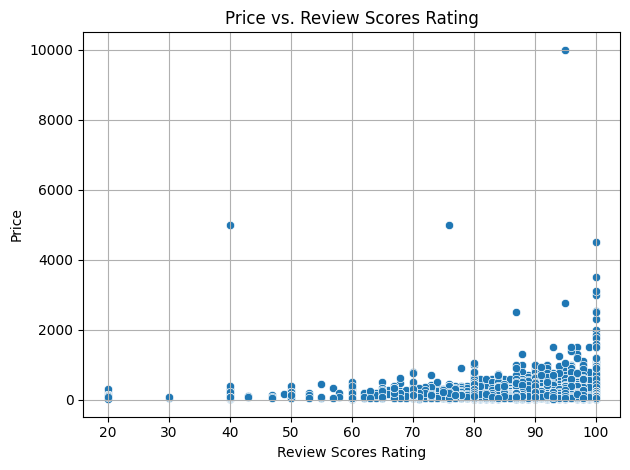

In [104]:
sns.scatterplot(data=data, x='Review Scores Rating', y='Price')
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Complex Model Transformation

# Summary 

# Optional Lasso Regularization 